# Bandpass filters in `torch-fourier-filter`

In [1]:
import matplotlib.pyplot as plt

from torch_fourier_filter.bandpass import (
    bandpass_filter,
    high_pass_filter,
    low_pass_filter,
)

## The `bandpass_filter` function

This function accepts in a high & low cutoff frequency (in terms of Nyquist frequency) and can return a 2D or 3D bandpass filter. Like the other TeamTomo packages, this function also handles if the filter should be fftshifted and/or rfft-ed.

Note that the `image_shape` parameter is in terms of the real-space shape.

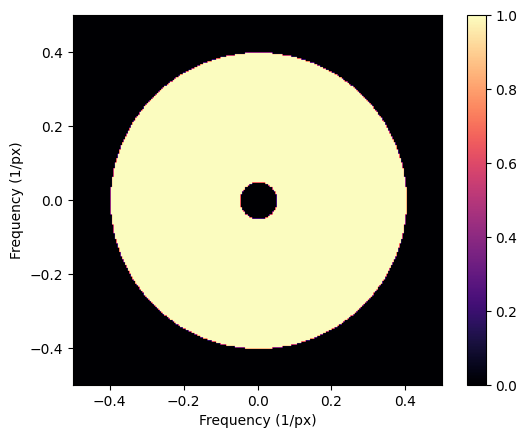

In [21]:
bpf = bandpass_filter(
    low=0.05,
    high=0.4,
    falloff=0.0,
    image_shape=(256, 256),
    rfft=False,
    fftshift=True,
)

extent = [-0.5, 0.5, -0.5, 0.5]
plt.imshow(bpf, cmap="magma", extent=extent)
plt.xlabel("Frequency (1/px)")
plt.ylabel("Frequency (1/px)")
plt.colorbar()
plt.show()

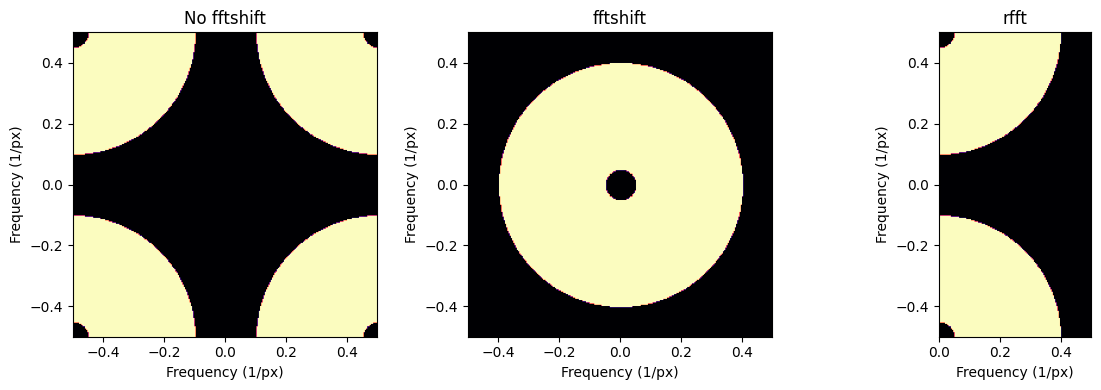

In [22]:
bpf_no_fftshift = bandpass_filter(
    low=0.05,
    high=0.4,
    falloff=0.0,
    image_shape=(256, 256),
    rfft=False,
    fftshift=False,
)
bpf_rfft = bandpass_filter(
    low=0.05,
    high=0.4,
    falloff=0.0,
    image_shape=(256, 256),
    rfft=True,
    fftshift=False,
)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(bpf_no_fftshift, cmap="magma", extent=extent)
axs[0].set_title("No fftshift")
axs[0].set_xlabel("Frequency (1/px)")
axs[0].set_ylabel("Frequency (1/px)")
axs[1].imshow(bpf, cmap="magma", extent=extent)
axs[1].set_title("fftshift")
axs[1].set_xlabel("Frequency (1/px)")
axs[1].set_ylabel("Frequency (1/px)")
axs[2].imshow(bpf_rfft, cmap="magma", extent=[0, 0.5, -0.5, 0.5])
axs[2].set_title("rfft")
axs[2].set_xlabel("Frequency (1/px)")
axs[2].set_ylabel("Frequency (1/px)")
plt.tight_layout()
plt.show()

### Softening the bandpass

The `falloff` parameter controls how quickly the filter transitions from 0 to 1. A value of 0 means the filter is a hard cutoff; values slightly above 0 will soften the transition.

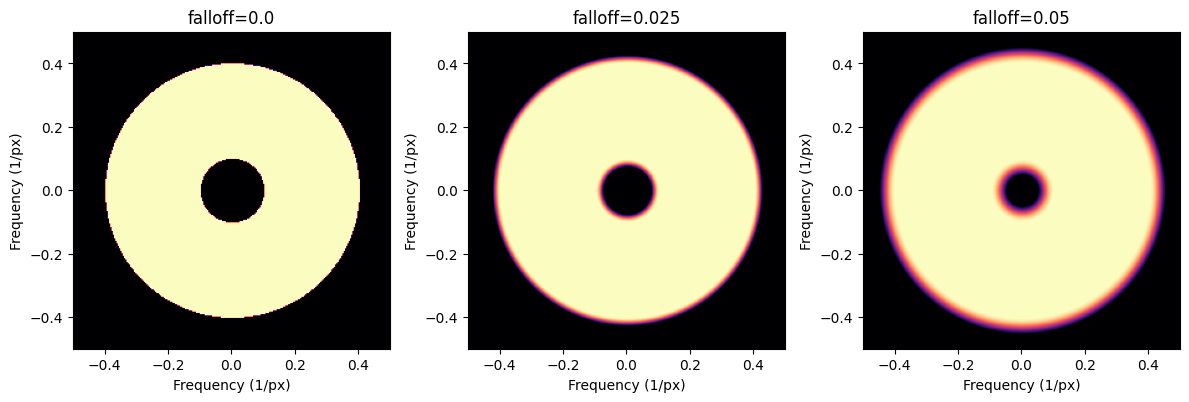

In [24]:
falloff_values = [0.0, 0.025, 0.05]
bpf_falloff = [
    bandpass_filter(
        low=0.1,
        high=0.4,
        falloff=falloff,
        image_shape=(256, 256),
        rfft=False,
        fftshift=True,
    )
    for falloff in falloff_values
]

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for ax, bpf, falloff in zip(axs, bpf_falloff, falloff_values):
    ax.imshow(bpf, cmap="magma", extent=extent)
    ax.set_title(f"falloff={falloff}")
    ax.set_xlabel("Frequency (1/px)")
    ax.set_ylabel("Frequency (1/px)")

plt.tight_layout()
plt.show()

## The `low_pass_filter` and `high_pass_filter` functions

These functions are just wrappers around `bandpass_filter` with the `low` or `high` cutoff frequency set to 0 or 1, respectively.

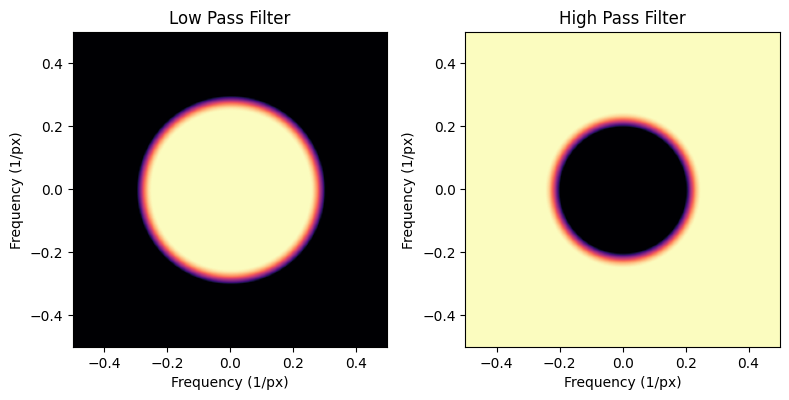

In [27]:
# Generate low pass and high pass filters
lpf = low_pass_filter(
    cutoff=0.25,
    falloff=0.05,
    image_shape=(256, 256),
    rfft=False,
    fftshift=True,
)

hpf = high_pass_filter(
    cutoff=0.25,
    falloff=0.05,
    image_shape=(256, 256),
    rfft=False,
    fftshift=True,
)

# Plot the filters
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].imshow(lpf, cmap="magma", extent=extent)
axs[0].set_title("Low Pass Filter")
axs[0].set_xlabel("Frequency (1/px)")
axs[0].set_ylabel("Frequency (1/px)")

axs[1].imshow(hpf, cmap="magma", extent=extent)
axs[1].set_title("High Pass Filter")
axs[1].set_xlabel("Frequency (1/px)")
axs[1].set_ylabel("Frequency (1/px)")

plt.tight_layout()
plt.show()